<a href="https://colab.research.google.com/github/bgsw404notfound/SkiSphe/blob/main/SkillSphere.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#VIGNESH's change
import pandas as pd
import numpy as np
import random
from faker import Faker

# Initialize Faker
fake = Faker()
Faker.seed(42)

# Set seeds for reproducibility
np.random.seed(42)
random.seed(42)

# Configuration
num_associates = 500
num_projects = 500
num_skills = 500
num_learning_goals = 20
num_learning_content = 2000  # Increased from num_external_content to reflect broader content types

# Skill rating levels (dictionary for associates, list for projects)
SKILL_LEVELS = {
    1: "L1",
    2: "L2",
    3: "L3",
    4: "L4"
}
SKILL_LEVELS_LIST = list(SKILL_LEVELS.values())  # For project requirements

# ======================
# ROLE-SPECIFIC EXPERIENCE RANGES
# ======================
role_experience_ranges = {
    'Software Developer': (0, 8),
    'Software Tester': (0, 8),
    'Security Engineer': (0, 8),
    'DevOps Engineer': (0, 8),
    'Data Scientist': (3, 10),
    'Cloud Architect': (10, 20),
    'Software Architect': (10, 20),
    'Project Manager': (15, 25),
    'Tech Lead': (8, 15),
    'Module Lead': (5, 12),
    'Group Manager': (10, 20),
    'Database Administrator': (3, 15),
    'UX Designer': (2, 12)
}

# ======================
# ROLE-SPECIFIC SKILLS
# ======================
role_skills = {
    'Software Developer': [
        'Python', 'Java', 'JavaScript', 'TypeScript', 'Spring Boot',
        'React', 'Angular', 'REST API', 'Microservices', 'Unit Testing',
        'Kotlin', 'Swift', 'Flutter', 'Dart', 'GraphQL',
        'WebAssembly', 'RxJS', 'Next.js', 'NestJS', 'Jest',
        'Deno', 'Rust', 'Web3', 'Blockchain', 'Smart Contracts',
        'Three.js', 'Web Components', 'Electron', 'JNI', 'FFI'
    ],

    'Software Tester': [
        'Selenium', 'Cypress', 'JMeter', 'Load Testing', 'Security Testing',
        'Test Automation', 'BDD', 'Cucumber', 'Postman', 'SoapUI',
        'Playwright', 'Karate', 'Robot Framework', 'TestNG', 'JUnit',
        'Allure Reports', 'Gatling', 'BrowserStack', 'Sauce Labs', 'PACT',
        'AI Testing', 'Visual Testing', 'Mutation Testing', 'Contract Testing',
        'Accessibility Testing', 'Chaos Testing', 'Performance Engineering',
        'Test Data Management', 'Service Virtualization', 'Test Observability'
    ],

    'Software Architect': [
        'System Design', 'Cloud Architecture', 'Microservices Architecture',
        'Performance Optimization', 'Scalability Design', 'CI/CD Pipeline Design',
        'Event-Driven Architecture', 'CQRS Pattern', 'Hexagonal Architecture',
        'Domain-Driven Design', 'Service Mesh', 'API Gateway Patterns',
        'EDA Patterns', 'Saga Pattern', 'Circuit Breaker', 'BFF Pattern',
        'Strangler Pattern', 'Anti-Corruption Layer', 'Modular Monolith',
        'Quantum Computing Architecture', 'AI System Design', 'Blockchain Architecture',
        'Edge Computing Architecture', 'Data Mesh Design', 'Digital Twin Architecture',
        'Compliance by Design', 'Sustainability Architecture', 'Chaos Engineering Design',
        'Cognitive Architecture'
    ],

    'Project Manager': [
        'Project Planning', 'Risk Management', 'Resource Allocation',
        'Stakeholder Management', 'Agile Methodologies', 'Scrum',
        'Budget Forecasting', 'JIRA Administration', 'Confluence',
        'Power BI Reporting', 'Stakeholder Mapping', 'Value Stream Mapping',
        'Benefits Realization', 'Portfolio Management', 'Program Management',
        'Agile Transformation', 'Change Management', 'Business Case Development',
        'Digital Transformation', 'AI Project Management', 'Blockchain Project Governance',
        'Remote Team Leadership', 'Crisis Management', 'Merger & Acquisition Integration',
        'Sustainability Project Management', 'Regulatory Compliance Management',
        'Innovation Management', 'Future Trends Analysis'
    ],

    'Data Scientist': [
        'Python', 'Machine Learning', 'TensorFlow', 'PyTorch', 'Data Visualization',
        'Big Data', 'Spark', 'SQL', 'Statistical Analysis',
        'LangChain', 'LLM Fine-Tuning', 'Hugging Face Transformers',
        'Computer Vision', 'Generative AI', 'Prompt Engineering',
        'Feature Engineering', 'Model Deployment', 'MLOps', 'Data Pipelines',
        'Quantum Machine Learning', 'Federated Learning', 'Causal Inference',
        'Graph Machine Learning', 'Time Series Forecasting', 'Anomaly Detection',
        'Reinforcement Learning', 'AI Ethics', 'Explainable AI', 'AI Governance'
    ],

    'DevOps Engineer': [
        'Docker', 'Kubernetes', 'Terraform', 'Jenkins', 'GitLab CI/CD',
        'Prometheus', 'Grafana', 'Linux Administration', 'Cloud Infrastructure',
        'ArgoCD', 'Crossplane', 'Tekton', 'Spinnaker',
        'Chaos Engineering', 'GitHub Actions', 'Observability',
        'Infrastructure as Code', 'Policy as Code', 'GitOps',
        'Platform Engineering', 'Internal Developer Platforms', 'Service Mesh',
        'Edge Computing', 'FinOps', 'Cloud Cost Optimization', 'SBOM Management',
        'Software Supply Chain Security', 'MLOps Pipelines', 'AI Infrastructure'
    ],

    'Cloud Architect': [
        'AWS', 'Azure', 'Google Cloud', 'Terraform', 'Kubernetes',
        'Microservices', 'Serverless', 'Cloud Security', 'Networking',
        'FinOps', 'Cloud Cost Optimization', 'Cloud Migration',
        'Edge Computing', 'Multi-Cloud Strategy', 'Cloud-Native Design',
        'Cloud Governance', 'Cloud Compliance', 'Cloud Automation',
        'AI Cloud Architecture', 'Quantum Cloud Computing', 'Sustainable Cloud',
        'Cloud Carbon Footprint Reduction', 'Cloud Digital Twins', 'Cloud Metaverse',
        'Cloud Robotics', 'Cloud IoT Architecture', 'Cloud Blockchain', 'Cloud AR/VR'
    ],

    'Security Engineer': [
        'Penetration Testing', 'SIEM', 'Firewalls', 'Cryptography',
        'GDPR Compliance', 'Vulnerability Assessment', 'SOC 2',
        'Threat Modeling', 'Zero Trust Architecture', 'MITRE ATT&CK',
        'Cloud Security Posture Management', 'Secure Code Review',
        'Container Security', 'API Security', 'Identity Management',
        'AI Security', 'Quantum Cryptography', 'Blockchain Security',
        'IoT Security', '5G Security', 'Biometric Security',
        'Security Automation', 'Threat Intelligence', 'Red Teaming', 'Blue Teaming'
    ],

    'Tech Lead': [
        'Technical Leadership', 'Code Reviews', 'Mentorship',
        'System Architecture', 'Team Management', 'Agile Coaching',
        'Architectural Decision Records', 'Tech Radar Creation',
        'Engineering Metrics', 'Developer Productivity', 'Backlog Refinement',
        'Technical Debt Management', 'Incident Management', 'Post-Mortems',
        'AI Engineering Leadership', 'Platform Engineering Leadership',
        'Developer Experience', 'InnerSource Leadership', 'Open Source Strategy',
        'Technical Evangelism', 'Future Tech Adoption', 'Skills Gap Analysis',
        'Technical Career Pathing', 'Engineering Culture Development'
    ],

    'Database Administrator': [
        'SQL', 'NoSQL', 'Database Design', 'Query Optimization',
        'Backup & Recovery', 'Data Modeling', 'ETL Processes',
        'Columnar Databases', 'Vector Databases', 'Time-Series DBs',
        'Database Sharding', 'Change Data Capture', 'Database Federation',
        'Database Security', 'Database Performance Tuning', 'Data Warehousing',
        'AI Database Optimization', 'Blockchain Databases', 'Graph Database Analytics',
        'Database DevOps', 'Database as Code', 'Database Observability',
        'Database Migration', 'Multi-Model Databases', 'NewSQL', 'Database Quantum Computing'
    ],

    'UX Designer': [
        'User Research', 'Wireframing', 'Prototyping', 'UI Design',
        'Usability Testing', 'Figma', 'Adobe XD', 'User Flows',
        'Design Systems', 'Motion Design', 'Voice UI Design',
        'Augmented Reality Interfaces', 'Accessibility Design',
        'UX Writing', 'UX Metrics', 'UX Strategy', 'Service Design',
        'AI UX Design', 'Quantum UX', 'Metaverse Design',
        'Neurodesign', 'Emotional Design', 'Sustainable UX',
        'Inclusive Design', 'Cross-Cultural UX', 'UX for IoT', 'UX for Blockchain'
    ]
}

# Common skills for all roles
common_skills = [
    'Git', 'Agile Methodologies', 'Problem Solving', 'Communication',
    'Technical Documentation', 'Debugging', 'Code Review',
    'Pair Programming', 'Mentoring', 'Stakeholder Communication',
    'Time Management', 'Critical Thinking', 'Continuous Learning',
    'Remote Collaboration', 'Digital Literacy', 'Emotional Intelligence',
    'Conflict Resolution', 'Adaptability', 'Creativity',
    'Data Literacy', 'Visual Thinking', 'Systems Thinking', 'Future Thinking'
]

# Grade definitions
grades = ['Junior', 'Mid-level', 'Senior', 'Lead', 'Principal']
grade_experience_ranges = {
    'Junior': (0, 3),
    'Mid-level': (4, 7),
    'Senior': (8, 12),
    'Lead': (13, 15),
    'Principal': (16, 25)
}

# ======================
# LEARNING CONTENT TITLES BY DOMAIN
# ======================
domain_titles = {
    'Software Developer': [
        'Python Programming Masterclass',
        'Java Enterprise Development',
        'Modern JavaScript Frameworks',
        'TypeScript for Large Applications',
        'Spring Boot Microservices',
        'React Advanced Patterns',
        'Angular State Management',
        'REST API Design Principles',
        'Microservices Architecture Patterns',
        'Unit Testing Best Practices',
        'Kotlin for Android Development',
        'SwiftUI for iOS Apps',
        'Flutter Cross-Platform Development',
        'GraphQL API Implementation',
        'WebAssembly Performance Optimization',
        'RxJS Reactive Programming',
        'Next.js Server-Side Rendering',
        'NestJS Enterprise Applications',
        'Jest Testing Framework Deep Dive',
        'Rust Systems Programming',
        'Web3 and Blockchain Fundamentals',
        'Smart Contract Development',
        'Three.js 3D Web Graphics',
        'Electron Desktop App Development'
    ],

    'Software Tester': [
        'Selenium WebDriver Masterclass',
        'Cypress End-to-End Testing',
        'JMeter Performance Testing',
        'Security Testing Fundamentals',
        'Test Automation Framework Design',
        'BDD with Cucumber',
        'API Testing with Postman',
        'Playwright Cross-Browser Testing',
        'Karate API Test Automation',
        'Robot Framework Essentials',
        'TestNG Advanced Features',
        'Allure Reporting Framework',
        'Gatling Load Testing',
        'AI-Powered Testing Techniques',
        'Visual Regression Testing',
        'Mutation Testing Strategies',
        'Accessibility Testing Compliance',
        'Chaos Engineering Principles',
        'Performance Engineering Workshop',
        'Service Virtualization Techniques'
    ],

    'Software Architect': [
        'System Design Interview Prep',
        'Cloud-Native Architecture',
        'Microservices Anti-Patterns',
        'Performance Optimization Techniques',
        'Scalability Design Patterns',
        'CI/CD Pipeline Architecture',
        'Event-Driven Systems Design',
        'Domain-Driven Design Workshop',
        'Service Mesh Implementation',
        'API Gateway Configuration',
        'Saga Pattern Implementation',
        'Circuit Breaker Resilience',
        'Strangler Pattern Migration',
        'Quantum Computing Concepts',
        'AI System Architecture',
        'Blockchain System Design',
        'Edge Computing Solutions',
        'Data Mesh Implementation',
        'Digital Twin Architecture',
        'Sustainable Software Design'
    ],

    'Project Manager': [
        'Agile Project Management',
        'Risk Management Strategies',
        'Resource Allocation Techniques',
        'Stakeholder Engagement Workshop',
        'Scrum Master Certification Prep',
        'Budget Forecasting Methods',
        'JIRA Administration Deep Dive',
        'Power BI for Project Reporting',
        'Value Stream Mapping Workshop',
        'Portfolio Management Essentials',
        'Agile Transformation Roadmap',
        'Change Management Framework',
        'Digital Transformation Strategy',
        'AI Project Governance',
        'Remote Team Leadership',
        'Crisis Management Simulation',
        'M&A Integration Planning',
        'Regulatory Compliance Management',
        'Innovation Management Techniques'
    ],

    'Data Scientist': [
        'Python for Data Science',
        'Machine Learning Fundamentals',
        'TensorFlow Neural Networks',
        'PyTorch Deep Learning',
        'Advanced Data Visualization',
        'Big Data Processing with Spark',
        'SQL for Data Analysis',
        'Statistical Modeling Techniques',
        'LLM Fine-Tuning Workshop',
        'Computer Vision Applications',
        'Generative AI Concepts',
        'Prompt Engineering Workshop',
        'Feature Engineering Methods',
        'MLOps Implementation',
        'Quantum Machine Learning Intro',
        'Time Series Forecasting',
        'Anomaly Detection Systems',
        'Reinforcement Learning Basics',
        'AI Ethics and Governance'
    ],

    'DevOps Engineer': [
        'Docker Containerization',
        'Kubernetes Cluster Management',
        'Terraform Infrastructure as Code',
        'Jenkins Pipeline Design',
        'GitLab CI/CD Implementation',
        'Prometheus Monitoring',
        'Grafana Dashboard Creation',
        'Linux Administration Essentials',
        'ArgoCD GitOps Workflows',
        'Chaos Engineering Practices',
        'GitHub Actions Automation',
        'Observability Stack Setup',
        'Policy as Code Implementation',
        'Platform Engineering Basics',
        'Service Mesh with Istio',
        'FinOps Cloud Cost Management',
        'SBOM Generation and Analysis',
        'MLOps Pipeline Design',
        'AI Infrastructure Setup'
    ],

    'Cloud Architect': [
        'AWS Solutions Architect',
        'Azure Cloud Design',
        'Google Cloud Professional',
        'Terraform Multi-Cloud',
        'Kubernetes in Production',
        'Serverless Architecture',
        'Cloud Security Best Practices',
        'Cloud Networking Deep Dive',
        'FinOps Cost Optimization',
        'Cloud Migration Strategies',
        'Edge Computing Solutions',
        'Multi-Cloud Governance',
        'Cloud-Native Design Patterns',
        'AI Cloud Infrastructure',
        'Quantum Cloud Computing',
        'Sustainable Cloud Practices',
        'Cloud Digital Twins',
        'Cloud IoT Architecture',
        'Cloud AR/VR Solutions'
    ],

    'Security Engineer': [
        'Penetration Testing Bootcamp',
        'SIEM Implementation',
        'Firewall Configuration',
        'Cryptography Fundamentals',
        'GDPR Compliance Workshop',
        'Vulnerability Assessment',
        'SOC 2 Compliance Guide',
        'Zero Trust Architecture',
        'MITRE ATT&CK Framework',
        'Container Security',
        'API Security Best Practices',
        'Identity Management Systems',
        'AI Security Threats',
        'Blockchain Security',
        'IoT Security Challenges',
        '5G Security Considerations',
        'Red Team Operations',
        'Blue Team Defense Strategies'
    ],

    'Tech Lead': [
        'Technical Leadership Workshop',
        'Effective Code Reviews',
        'Mentorship Program Design',
        'System Architecture Planning',
        'Agile Team Management',
        'Architecture Decision Records',
        'Tech Radar Creation',
        'Engineering Metrics Analysis',
        'Technical Debt Management',
        'Incident Response Leadership',
        'AI Engineering Leadership',
        'Platform Engineering Strategy',
        'Developer Experience Optimization',
        'Open Source Contribution Guide',
        'Technical Evangelism Skills',
        'Future Tech Adoption Framework',
        'Engineering Culture Development'
    ],

    'Database Administrator': [
        'SQL Performance Tuning',
        'NoSQL Database Selection',
        'Database Design Principles',
        'Query Optimization Techniques',
        'Backup and Recovery Strategies',
        'Data Modeling Workshop',
        'ETL Pipeline Development',
        'Vector Databases for AI',
        'Time-Series Data Management',
        'Database Sharding Patterns',
        'Database Security Hardening',
        'Data Warehousing Solutions',
        'Graph Database Analytics',
        'Database DevOps Practices',
        'Database Migration Planning',
        'Multi-Model Database Usage',
        'Quantum Database Concepts'
    ],

    'UX Designer': [
        'User Research Methods',
        'Wireframing Workshop',
        'Prototyping Techniques',
        'UI Design Principles',
        'Usability Testing Practices',
        'Figma Masterclass',
        'Design Systems Creation',
        'Motion Design Fundamentals',
        'Voice UI Design Patterns',
        'AR Interface Design',
        'Accessibility Compliance',
        'UX Writing Workshop',
        'UX Metrics Analysis',
        'Service Design Thinking',
        'AI UX Design Considerations',
        'Metaverse Design Principles',
        'Sustainable UX Practices',
        'Inclusive Design Workshop'
    ],

    'General': [
        'Git Version Control Mastery',
        'Agile Methodology Certification',
        'Technical Documentation Writing',
        'Effective Debugging Techniques',
        'Pair Programming Workshop',
        'Stakeholder Communication',
        'Time Management for Tech Professionals',
        'Critical Thinking Skills',
        'Continuous Learning Strategies',
        'Remote Collaboration Tools',
        'Emotional Intelligence at Work',
        'Conflict Resolution Workshop',
        'Systems Thinking Approach',
        'Future Technology Trends'
    ]
}

# ======================
# DATA GENERATION
# ======================

# Define all_skills by combining all role-specific skills and common skills
all_skills = list(set([skill for skills in role_skills.values() for skill in skills] + common_skills))

# Generate roles with weighted distribution
roles = list(role_experience_ranges.keys())
role_weights = [10, 8, 5, 3, 7, 4, 4, 3, 5, 4, 2, 5, 3]

# Generate associate profiles
associate_profiles = pd.DataFrame({
    'associate_id': range(1, num_associates + 1),
    'name': [fake.name() for _ in range(num_associates)],
    'role': random.choices(roles, weights=role_weights, k=num_associates)
})

# Assign years of experience based on role
def assign_experience(role):
    min_exp, max_exp = role_experience_ranges[role]
    return random.randint(min_exp, max_exp)

associate_profiles['years_of_experience'] = associate_profiles['role'].apply(assign_experience)

# Assign grades
associate_profiles['grade'] = associate_profiles['years_of_experience'].apply(
    lambda x: next(grade for grade, (min_exp, max_exp) in grade_experience_ranges.items()
              if min_exp <= x <= max_exp)
)

# Function to generate skill ratings based on experience and role
def generate_skill_ratings(role, years_exp):
    role_skills_list = role_skills.get(role, []) + common_skills
    skill_ratings = {}

    for skill in role_skills_list:
        # Base level (1-4)
        base_level = random.randint(1, 4)

        # Adjust based on experience
        exp_adjustment = min(years_exp // 3, 1)  # +0 to +1 based on experience
        final_level = min(base_level + exp_adjustment, 4)  # Cap at L4-Expert

        skill_ratings[skill] = SKILL_LEVELS[final_level]

    # Add some random skills from other domains (10% chance per skill)
    for skill in all_skills:
        if skill not in skill_ratings and random.random() < 0.1:
            skill_ratings[skill] = SKILL_LEVELS[random.randint(1, 2)]  # Lower level for non-core skills

    return skill_ratings

# Create a list of dictionaries for skill ratings
skill_ratings_list = []
for _, row in associate_profiles.iterrows():
    ratings = generate_skill_ratings(row['role'], row['years_of_experience'])
    skill_ratings_list.append(ratings)

# Convert to DataFrame for skill inventory
skill_ratings_df = pd.DataFrame(skill_ratings_list)

# Generate projects data with skills as columns
all_possible_skills = list(set(
    [skill for skills in role_skills.values() for skill in skills] +
    common_skills
))

# Generate projects data
projects = []
for project_id in range(1, num_projects + 1):
    project = {
        'project_id': project_id,
        'project_name': f'Project {project_id}',
        'Project_status': random.choice(['Current', 'Upcoming'])
    }

    # Assign random skill level (L1-L4) to every skill
    for skill in all_possible_skills:
        project[skill] = random.choice(SKILL_LEVELS_LIST)  # Using list version

    projects.append(project)

# Create DataFrame
projects_df = pd.DataFrame(projects)

# Generate certifications data
certifications = {
    'Software Developer': [
        'Oracle Certified Professional: Java SE Developer',
        'Microsoft Certified: Azure Developer Associate',
        'AWS Certified Developer',
        'Google Associate Android Developer',
        'Spring Professional Certification',
        'React Certified Developer',
        'Node.js Certified Developer',
        'Python Institute PCAP',
        'Kotlin Certified Developer',
        'Swift Certified Developer'
    ],
    'Software Tester': [
        'ISTQB Certified Tester',
        'Certified Agile Tester',
        'Selenium WebDriver Certification',
        'Certified Test Automation Engineer',
        'Performance Testing Certification',
        'Security Testing Certification',
        'Cucumber Testing Certification',
        'Postman API Testing Certification',
        'Certified Mobile App Tester',
        'AI Testing Certification'
    ],
    'Software Architect': [
        'AWS Certified Solutions Architect',
        'Microsoft Certified: Azure Solutions Architect',
        'Google Professional Cloud Architect',
        'Certified Software Architect',
        'TOGAF Certification',
        'Certified Enterprise Architect',
        'Microservices Architecture Certification',
        'Cloud Native Architect Certification',
        'Certified Blockchain Architect',
        'AI System Architect Certification'
    ],
    'Project Manager': [
        'Project Management Professional (PMP)',
        'Certified ScrumMaster (CSM)',
        'PRINCE2 Practitioner',
        'Agile Certified Practitioner (PMI-ACP)',
        'Certified SAFe Agilist',
        'Professional Scrum Master (PSM)',
        'Program Management Professional (PgMP)',
        'Portfolio Management Professional (PfMP)',
        'Risk Management Professional (PMI-RMP)',
        'Certified Digital Transformation Officer'
    ],
    'Data Scientist': [
        'Microsoft Certified: Azure Data Scientist',
        'AWS Certified Machine Learning Specialty',
        'Google Professional Data Engineer',
        'TensorFlow Developer Certificate',
        'Data Science Council of America (DASCA)',
        'Certified Analytics Professional (CAP)',
        'Cloudera Certified Data Scientist',
        'IBM Data Science Professional',
        'SAS Certified Data Scientist',
        'Certified AI Professional'
    ],
    'DevOps Engineer': [
        'AWS Certified DevOps Engineer',
        'Microsoft Certified: DevOps Engineer Expert',
        'Google Professional DevOps Engineer',
        'Docker Certified Associate',
        'Certified Kubernetes Administrator (CKA)',
        'Red Hat Certified Specialist in DevOps',
        'Terraform Associate Certification',
        'GitLab Certified DevOps Professional',
        'Certified Jenkins Engineer',
        'Chaos Engineering Practitioner'
    ],
    'Cloud Architect': [
        'AWS Certified Solutions Architect',
        'Microsoft Certified: Azure Solutions Architect',
        'Google Professional Cloud Architect',
        'Certified Cloud Security Professional (CCSP)',
        'Certified Cloud Architect (CCA)',
        'Multi-Cloud Architect Certification',
        'Certified Kubernetes Administrator (CKA)',
        'OpenStack Administrator Certification',
        'Certified Cloud Economist',
        'FinOps Certified Professional'
    ],
    'Security Engineer': [
        'Certified Information Systems Security Professional (CISSP)',
        'Certified Ethical Hacker (CEH)',
        'CompTIA Security+',
        'Certified Cloud Security Professional (CCSP)',
        'GIAC Security Essentials (GSEC)',
        'Certified Information Security Manager (CISM)',
        'Offensive Security Certified Professional (OSCP)',
        'Certified SOC Analyst (CSA)',
        'Certified Zero Trust Architect',
        'Certified AI Security Specialist'
    ],
    'Tech Lead': [
        'Certified Technical Lead Professional',
        'Certified Agile Technical Leader',
        'Certified Engineering Manager',
        'Certified Software Development Professional',
        'Certified Lead Developer',
        'Certified Platform Engineering Lead',
        'Certified Open Source Leader',
        'Certified Developer Experience Specialist',
        'Certified Technical Evangelist',
        'Certified Engineering Culture Architect'
    ],
    'Database Administrator': [
        'Oracle Database Administrator Certified Professional',
        'Microsoft Certified: Azure Database Administrator',
        'MongoDB Certified DBA',
        'IBM Certified Database Administrator',
        'Certified PostgreSQL Administrator',
        'Cassandra Administrator Certification',
        'Redis Certified Administrator',
        'Certified Data Warehouse Professional',
        'Certified Vector Database Specialist',
        'Certified Time-Series Database Expert'
    ],
    'UX Designer': [
        'Certified UX Professional (UXP)',
        'Google UX Design Professional Certificate',
        'NN/g UX Certification',
        'Certified Usability Analyst (CUA)',
        'Adobe Certified Expert (ACE) in XD',
        'Figma Certified Designer',
        'Certified Interaction Designer (CID)',
        'Certified Accessibility Specialist',
        'Certified Service Designer',
        'Certified AI UX Specialist'
    ]
}

# Generate skill inventory with certifications and skill ratings
skill_inventory = []
for associate_id in range(1, num_associates + 1):
    role = associate_profiles[associate_profiles['associate_id'] == associate_id]['role'].values[0]
    role_certs = certifications.get(role, [])

    # Ensure we have enough certifications to work with
    if len(role_certs) < 10:
        role_certs.extend([f"{role} Certification {i}" for i in range(len(role_certs), 10)])

    # Shuffle certifications for random distribution
    random.shuffle(role_certs)

    # Assign 5-7 obtained certifications
    num_obtained = random.randint(5, 7)
    obtained_certs = role_certs[:num_obtained]

    # Assign 2-3 in-progress certifications from remaining
    remaining_certs = role_certs[num_obtained:]
    num_in_progress = random.randint(2, 3)

    # If not enough remaining, take some from obtained while maintaining minimums
    if len(remaining_certs) < num_in_progress:
        needed = num_in_progress - len(remaining_certs)
        in_progress_certs = remaining_certs + obtained_certs[-needed:]
        obtained_certs = obtained_certs[:-needed]
    else:
        in_progress_certs = remaining_certs[:num_in_progress]

    # Learning time data
    available_time = random.choice([5, 10, 15, 20])
    utilized_time = random.randint(int(available_time*0.3), int(available_time*0.9))

    # Create skill inventory record
    inventory_record = {
        'associate_id': associate_id,
        'certifications_obtained': ', '.join(obtained_certs),
        'certifications_in_progress': ', '.join(in_progress_certs),
        'available_learning_time': f"{available_time} hours/month",
        'learning_time_utilized_previous_year': f"{utilized_time} hours/month"
    }

    # Add skill ratings from the skill_ratings_df
    skill_ratings = skill_ratings_df.iloc[associate_id-1].to_dict()
    inventory_record.update(skill_ratings)

    skill_inventory.append(inventory_record)

skill_inventory_df = pd.DataFrame(skill_inventory)

# Generate learning preferences
learning_preferences = pd.DataFrame({
    'preference_id': range(1, num_associates + 1),
    'associate_id': range(1, num_associates + 1),
    'preferred_format': np.random.choice(['Video', 'Text', 'Interactive', 'Classroom'], num_associates),
    'weekly_hours': np.random.randint(1, 6, num_associates),
    'preferred_domain': [random.choice(list(role_skills.keys())) for _ in range(num_associates)]
})

# Generate learning goals
def assign_random_level():
    return random.choice(SKILL_LEVELS_LIST[1:])

learning_goals = []
for associate_id in range(1, num_associates + 1):
    role = associate_profiles[associate_profiles['associate_id'] == associate_id]['role'].values[0]
    role_skills_list = role_skills.get(role, []) + common_skills
    all_possible_skills = list(set(role_skills_list + [s for skills in role_skills.values() for s in skills] + common_skills))

    num_current_skills = random.randint(5, 15)
    current_skills = random.sample(all_possible_skills, num_current_skills)
    available_skills = list(set(all_possible_skills) - set(current_skills))

    if not available_skills:
        available_skills = all_possible_skills

    manager_recommended = random.sample(available_skills, min(2, len(available_skills)))
    remaining_skills = list(set(available_skills) - set(manager_recommended))
    dept_recommended = random.sample(remaining_skills, min(2, len(remaining_skills))) if remaining_skills else []
    remaining_skills = list(set(remaining_skills) - set(dept_recommended))
    self_interest = random.sample(remaining_skills, min(2, len(remaining_skills))) if remaining_skills else []

    # Format with levels
    def format_skills(skills):
        return ', '.join([f"{skill} - {assign_random_level()}" for skill in skills])

    learning_goals.append({
        'associate_id': associate_id,
        'skills_recommended_by_manager': format_skills(manager_recommended),
        'skills_recommended_by_department': format_skills(dept_recommended),
        'skills_selected_for_own': format_skills(self_interest)
    })

# Create DataFrame
learning_goals_df = pd.DataFrame(learning_goals)

# ======================
# LEARNING CONTENT GENERATION
# ======================
learning_content_types = ['Internal', 'External', 'Classroom', 'Article', 'Hands-On']
content_providers = ['Coursera', 'Udemy', 'edX', 'Pluralsight', 'Internal LMS', 'LinkedIn Learning', 'Skillsoft']
content_formats = ['Video', 'Audio', 'Classroom', 'Instructor-led', 'Interactive', 'Text-based']
content_languages = ['English']
certification_options = ['Yes', 'No']

learning_content = []
for content_id in range(1, num_learning_content + 1):
    content_type = random.choice(learning_content_types)
    provider = (random.choice(content_providers) if content_type in ['External', 'Article']
               else 'Internal LMS' if content_type == 'Internal'
               else 'Corporate Training')

    # Select applicable roles (1-3 roles)
    applicable_roles = random.sample(roles, k=random.randint(1, 3))

    # Generate relevant title if possible
    title = None
    for role in applicable_roles:
        if role in domain_titles and random.random() > 0.7:  # 70% chance to use generic title
            title = random.choice(domain_titles[role])
            break
    if not title:
        title = random.choice(domain_titles['General']) if random.random() > 0.5 else f"{random.choice(['Advanced', 'Fundamentals of', 'Practical'])} {random.choice(['Course', 'Training', 'Workshop'])} {content_id}"

    learning_content.append({
        'Content type': content_type,
        'Content id': content_id,
        'Title': title,
        'Provider': provider,
        'Duration': random.randint(30, 480),  # 30 mins to 8 hours
        'Level': random.choice(['L1', 'L2', 'L3', 'L4']),
        'Roles': ', '.join(applicable_roles),
        'Format': random.choice(content_formats),
        'Language': 'English',
        'Is Certification available?': random.choice(certification_options)
    })

learning_content_df = pd.DataFrame(learning_content)

# ======================
# ASSIGN 1-3 PROJECTS TO EACH ASSOCIATE
# ======================
project_ids = projects_df['project_id'].tolist()

# Assign 1-3 unique, sorted projects to every associate
associate_profiles['assigned_project'] = [
    ', '.join(map(str, sorted(random.sample(project_ids, k=random.randint(1, 3)))))
    for _ in range(num_associates)
]

# Keep only the basic profile columns in associate_profiles
associate_profiles = associate_profiles[['associate_id', 'name', 'role', 'years_of_experience', 'grade', 'assigned_project']]

# Save to CSV
associate_profiles.to_csv('associate_profiles.csv', index=False)
projects_df.to_csv('projects.csv', index=False)
skill_inventory_df.to_csv('skill_inventory.csv', index=False)
learning_preferences.to_csv('learning_preferences.csv', index=False)
learning_goals_df.to_csv('learning_goals.csv', index=False)
learning_content_df.to_csv('learning_content.csv', index=False)

print("Data generation complete! Files saved to CSV.")

Data generation complete! Files saved to CSV.


In [ ]:
#Jayasri changes
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from transformers import pipeline
from sklearn.cluster import KMeans
import torch

# Load datasets
associates = pd.read_csv("associate_profiles.csv")
projects = pd.read_csv("projects.csv")
external_content = pd.read_csv("external_content.csv")

# Define skill levels
skill_levels = {"L1-Beginner": 1, "L2-Dependant": 2, "L3-Independant": 3, "L4-Expert": 4}
inverse_skill_levels = {1: "L1-Beginner", 2: "L2-Dependant", 3: "L3-Independant", 4: "L4-Expert"}

# Extract skill columns
skill_columns = [col for col in associates.columns if col.startswith("skill_")]

# Prepare ML data with error handling
def prepare_ml_data():
    data = []
    for _, row in associates.iterrows():
        for skill_col in skill_columns:
            skill_name = skill_col.replace("skill_", "")
            current_level = row[skill_col]
            if pd.notna(current_level):
                current_level_int = skill_levels.get(current_level, 1)
                desired_level = min(current_level_int + np.random.randint(0, 2), 4)
                data.append({
                    "associate_id": row["associate_id"],
                    "skill": skill_name,
                    "current_level": current_level_int,
                    "desired_level": desired_level,
                    "years_experience": row.get("years_experience", 0)
                })
    return pd.DataFrame(data)

ml_data = prepare_ml_data()

# Train a RandomForest model
X = ml_data[["current_level", "years_experience"]]
y = ml_data["desired_level"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print(f"Model accuracy: {model.score(X_test, y_test):.2f}")

# Predict skill gaps using the model
def calculate_skill_gap_ml(row):
    gaps = []
    for skill_col in skill_columns:
        skill_name = skill_col.replace("skill_", "")
        current_level = row[skill_col]
        if pd.notna(current_level):
            current_level_int = skill_levels.get(current_level, 1)
            features = pd.DataFrame([[current_level_int, row.get("years_experience", 0)]],
                                  columns=["current_level", "years_experience"])
            desired_level_int = model.predict(features)[0]
            if desired_level_int > current_level_int:
                gaps.append({"skill": skill_name, "current_level": current_level,
                            "desired_level": inverse_skill_levels[desired_level_int]})
    return gaps

associates["skill_gaps"] = associates.apply(calculate_skill_gap_ml, axis=1)

# --- NLP-Based Course Recommendation with PyTorch ---
# Load a pre-trained NLP model with PyTorch explicitly
nlp = pipeline("feature-extraction", model="distilbert-base-uncased", framework="pt")

def get_embedding(text):
    with torch.no_grad():  # Disable gradient computation for efficiency
        embedding = nlp(text)[0]  # Get embeddings
    return np.mean(embedding, axis=0)  # Average over token embeddings

# Precompute embeddings for course titles
external_content["embedding"] = external_content["title"].apply(get_embedding)

def recommend_course_nlp(skill, desired_level):
    skill_embedding = get_embedding(skill)
    similarities = external_content["embedding"].apply(
        lambda x: np.dot(x, skill_embedding) / (np.linalg.norm(x) * np.linalg.norm(skill_embedding))
    )
    best_match_idx = similarities.idxmax()
    return external_content.loc[best_match_idx, "title"]

# Assign learning path
def assign_learning_path(row):
    learning_path = []
    for gap in row["skill_gaps"]:
        recommended_course = recommend_course_nlp(gap["skill"], gap["desired_level"])
        learning_path.append({"skill": gap["skill"], "course": recommended_course})
    return learning_path

associates["learning_path"] = associates.apply(assign_learning_path, axis=1)

# Clustering for personalization
skill_matrix = associates[skill_columns].fillna("L1-Beginner").applymap(lambda x: skill_levels[x])
kmeans = KMeans(n_clusters=3, random_state=42)
associates["cluster"] = kmeans.fit_predict(skill_matrix)

def adjust_learning_by_cluster(row):
    cluster = row["cluster"]
    learning_path = row["learning_path"]
    if cluster == 0:  # Example: Cluster 0 prioritizes tech skills
        learning_path.sort(key=lambda x: "tech" in x["skill"].lower(), reverse=True)
    return learning_path

associates["learning_path"] = associates.apply(adjust_learning_by_cluster, axis=1)

# Project-based learning
def check_project_demands(associate_id):
    associate_skills = set([col.replace("skill_", "") for col in skill_columns if associates.loc[associates["associate_id"] == associate_id, col].notna().any()])
    project_skills = set(projects["required_techstacks"].explode())
    missing_skills = project_skills - associate_skills
    project_learning = [{"skill": skill, "course": recommend_course_nlp(skill, "L1-Beginner")} for skill in missing_skills]
    return project_learning

associates["project_based_learning"] = associates["associate_id"].apply(check_project_demands)

# Filter and save results
filtered_associates = associates[["name", "skill_gaps", "learning_path", "project_based_learning", "cluster"]]
filtered_associates.to_csv("learning_recommendations_ai.csv", index=False)

print("✅ AI-enhanced learning recommendations saved successfully!")

In [3]:
#below is vignesh's code

In [2]:
import pandas as pd

# 1. Load all three CSV files
print("Loading files...")
associate_profiles = pd.read_csv('associate_profiles.csv')
skill_inventory = pd.read_csv('skill_inventory.csv')
learning_goals = pd.read_csv('learning_goals.csv')

# 2. Verify primary keys
print("\nUnique ID counts:")
print(f"Associate profiles: {associate_profiles['associate_id'].nunique()} associates")
print(f"Skill inventory: {skill_inventory['associate_id'].nunique()} associates")
print(f"Learning goals: {learning_goals['associate_id'].nunique()} associates")

# 3. Sequential merging
print("\nMerging files...")

# First merge: Profiles + Skill Inventory
merged_data = pd.merge(
    associate_profiles,
    skill_inventory,
    on='associate_id',
    how='left',  # Only keep associates with skill data
    validate='one_to_one'  # Ensure no duplicate associates
)

# Second merge: Add Learning Goals
merged_data = pd.merge(
    merged_data,
    learning_goals,
    on='associate_id',
    how='left',  # Keep associates even if missing goals
    validate='one_to_one'
)

# 5. Save merged data
merged_data.to_csv('merged_core_data.csv', index=False)
print("\nSaved to 'merged_core_data.csv'")


Loading files...

Unique ID counts:
Associate profiles: 500 associates
Skill inventory: 500 associates
Learning goals: 500 associates

Merging files...

Saved to 'merged_core_data.csv'


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style that works universally
plt.style.use('ggplot')  # Alternative: 'seaborn-v0_8', 'fivethirtyeight', 'classic'
sns.set_theme(style="whitegrid")  # Modern seaborn style

# 1. Headcount by Role (Improved Bar Chart)
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=merged_data,
                 y='role',  # Horizontal bars are easier to read
                 order=merged_data['role'].value_counts().index,
                 palette="viridis")
plt.title('Headcount Distribution by Role', fontsize=14, pad=20)
plt.xlabel('Number of Associates', fontsize=12)
plt.ylabel('')  # Remove 'role' label as it's obvious
plt.tight_layout()
plt.show()

# 2. Years of Experience Distribution (Enhanced Histogram)
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=merged_data,
                x='years_of_experience',
                bins=range(0, int(merged_data['years_of_experience'].max())+5, 5),
                kde=True,
                color='skyblue',
                edgecolor='white')
plt.title('Distribution of Years of Experience', fontsize=14, pad=20)
plt.xlabel('Years of Experience', fontsize=12)
plt.ylabel('Number of Associates', fontsize=12)
sns.despine()  # Cleaner borders
plt.show()

# 3. Combined View (Violin Plot - Better for distribution visualization)
plt.figure(figsize=(14, 8))
top_roles = merged_data['role'].value_counts().nlargest(10).index  # Limit to top 10 roles
filtered_data = merged_data[merged_data['role'].isin(top_roles)]

ax = sns.violinplot(data=filtered_data,
                  x='role',
                  y='years_of_experience',
                  palette="Set2",
                  inner="quartile")  # Show median/IQR
plt.title('Years of Experience Distribution by Role (Top 10 Roles)', fontsize=14, pad=20)
plt.xlabel('Job Role', fontsize=12)
plt.ylabel('Years of Experience', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Output()

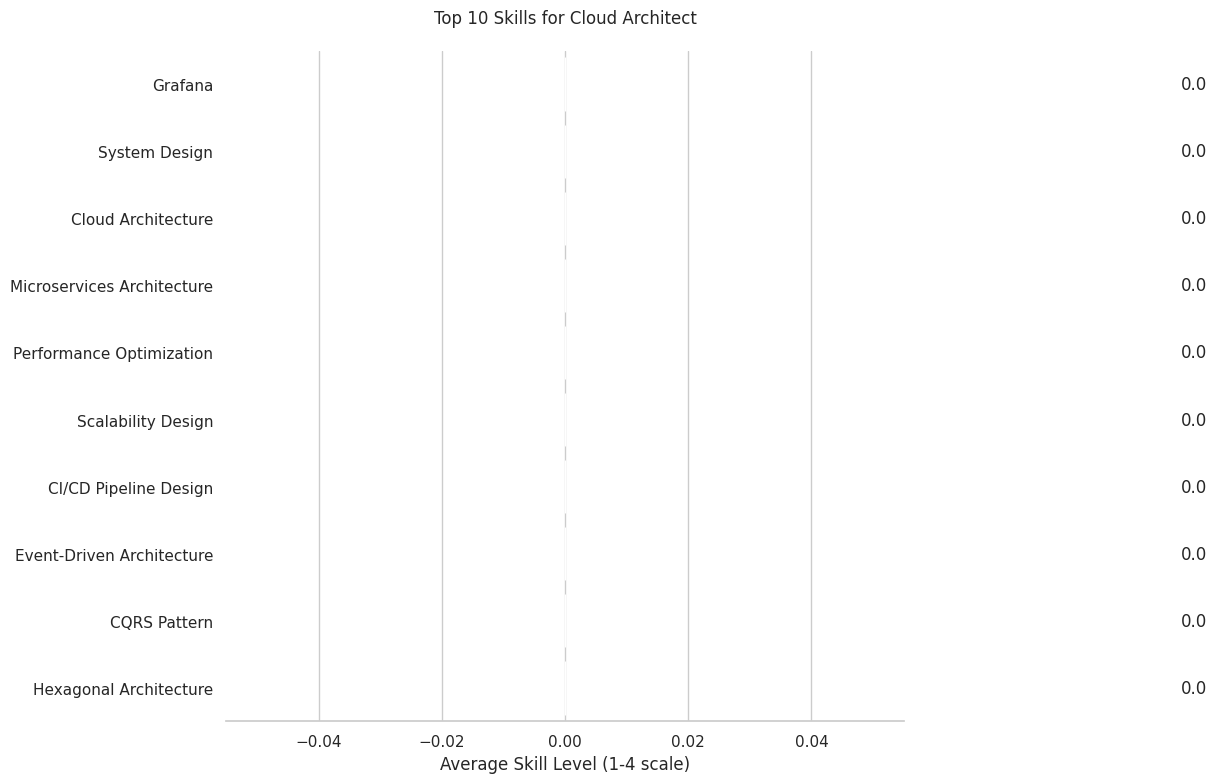

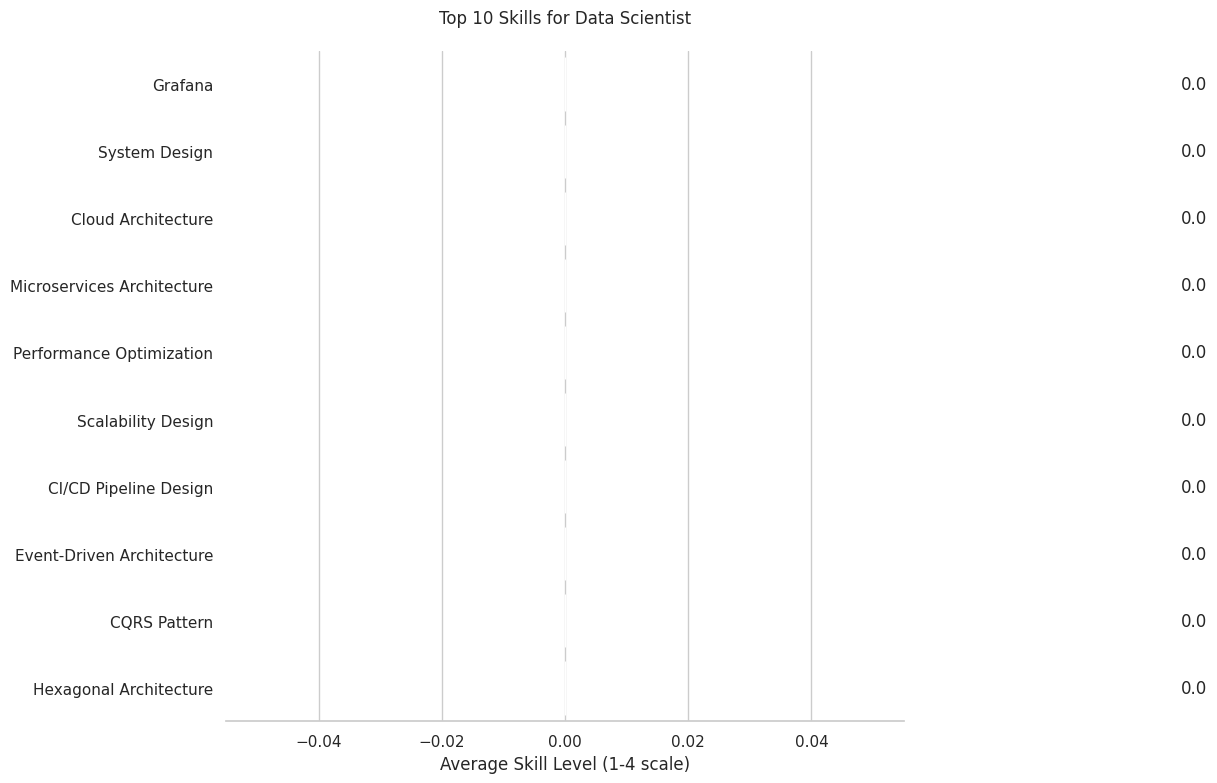

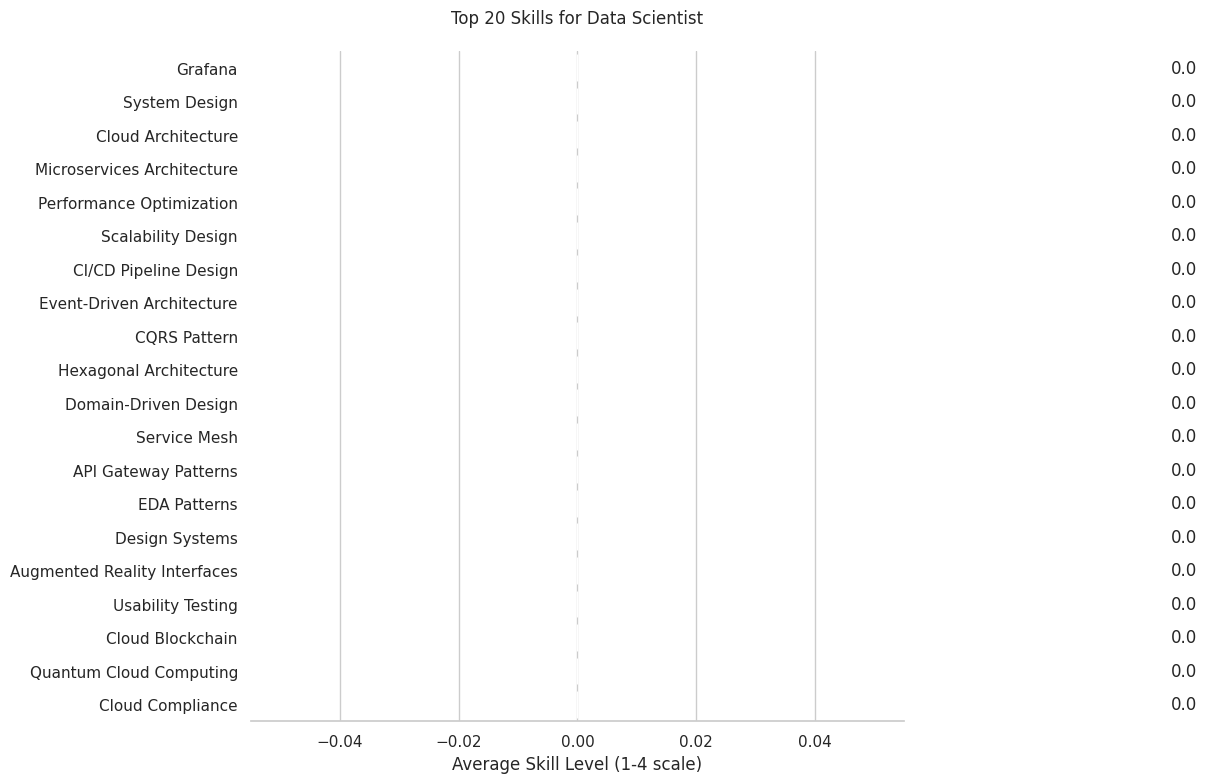

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ipywidgets import interact, Dropdown, IntSlider, RadioButtons, VBox, HBox
from IPython.display import display, clear_output
import ipywidgets as widgets

# Enable widgets in Colab
from google.colab import output
output.enable_custom_widget_manager()

# 1. Prepare the data
all_columns = merged_data.columns.tolist()
skill_columns = all_columns[all_columns.index('System Design'):all_columns.index('Grafana')+1]

# Convert skill levels to numeric (L1=1, L2=2, etc.)
for skill in skill_columns:
    merged_data[skill] = merged_data[skill].apply(
        lambda x: int(x[1]) if isinstance(x, str) and x.startswith('L') else 0
    )

# 2. Create visualization function
def plot_skills(analysis_type, selection, num_skills=10):
    plt.figure(figsize=(14, 8))

    if analysis_type == 'By Role':
        data = merged_data[merged_data['role'] == selection]
        title = f"Top {num_skills} Skills for {selection}"
        skill_avg = data[skill_columns].mean().sort_values(ascending=False).head(num_skills)

        ax = sns.barplot(x=skill_avg.values, y=skill_avg.index, palette='viridis')
        plt.xlabel('Average Skill Level (1-4 scale)')
    else:
        data = merged_data[merged_data['name'] == selection]
        if len(data) == 0:
            print("No data found for this associate")
            return

        associate = data.iloc[0]
        title = f"Skill Profile for {selection}\n({associate['role']}, {associate['years_of_experience']} yrs exp)"

        skills = data[skill_columns].T.sort_values(by=data.index[0], ascending=False).head(num_skills)
        skills.columns = ['Level']

        ax = sns.barplot(x='Level', y=skills.index, data=skills, palette='rocket')
        plt.xlabel('Skill Level (1-4 scale)')

    plt.title(title, pad=20)
    plt.ylabel('')
    sns.despine(left=True)

    # Add value labels
    for i, v in enumerate(ax.patches):
        value = v.get_width()
        ax.text(value + 0.1, v.get_y() + v.get_height()/2,
                f"{value:.1f}" if analysis_type == 'By Role' else f"{value:.0f}",
                ha='left', va='center')

    plt.tight_layout()
    plt.show()

# 3. Create interactive widget
def create_interactive():
    # Create widgets
    analysis_type = RadioButtons(
        options=['By Role', 'By Associate Name'],
        value='By Role',
        description='View:'
    )

    role_dropdown = Dropdown(
        options=sorted(merged_data['role'].unique()),
        description='Role:',
        disabled=False
    )

    name_dropdown = Dropdown(
        options=sorted(merged_data['name'].unique()),
        description='Name:',
        disabled=True
    )

    num_slider = IntSlider(
        value=10,
        min=5,
        max=20,
        step=1,
        description='Skills to show:'
    )

    # Create output area
    out = widgets.Output()

    # Update function
    def on_change(change):
        with out:
            clear_output(wait=True)
            if analysis_type.value == 'By Role':
                plot_skills('By Role', role_dropdown.value, num_slider.value)
            else:
                plot_skills('By Associate Name', name_dropdown.value, num_slider.value)

    # Toggle dropdowns based on analysis type
    def toggle_dropdowns(change):
        if change['new'] == 'By Role':
            role_dropdown.disabled = False
            name_dropdown.disabled = True
            on_change(None)  # Trigger update
        else:
            role_dropdown.disabled = True
            name_dropdown.disabled = False
            on_change(None)  # Trigger update

    # Set up observers
    analysis_type.observe(toggle_dropdowns, names='value')
    role_dropdown.observe(on_change, names='value')
    name_dropdown.observe(on_change, names='value')
    num_slider.observe(on_change, names='value')

    # Initial display
    display(VBox([analysis_type, HBox([role_dropdown, name_dropdown]), num_slider]))
    display(out)
    on_change(None)  # Initial plot

# 4. Run the interactive widget
create_interactive()